# Lecture 9: Functions #

In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Histogram Example

In [3]:
# From https://womenintheworld.org/highest-paid-actress/
incomes = Table.read_table('2022_female_actors.csv')
incomes.show(3)

Name,Income (millions)
Scarlett Johansson,56
Sofia Vergara,43
Angelina Jolie,35.5


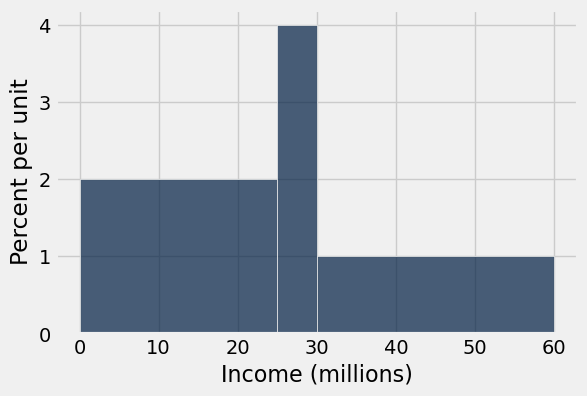

In [5]:
my_bins = make_array(0, 25, 30, 60)
incomes.hist('Income (millions)', bins=my_bins)

In [7]:
min(incomes.column(1))

12.5

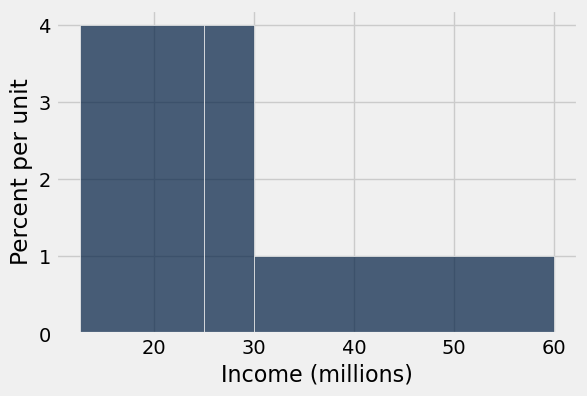

In [9]:
my_bins = make_array(min(incomes.column(1)), 25, 30, 60)
incomes.hist('Income (millions)', bins=my_bins)

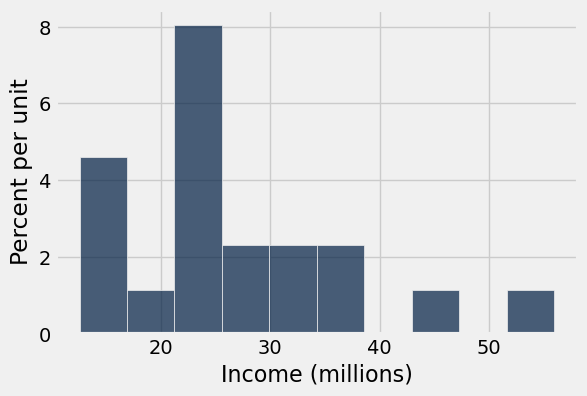

In [11]:
incomes.hist('Income (millions)')

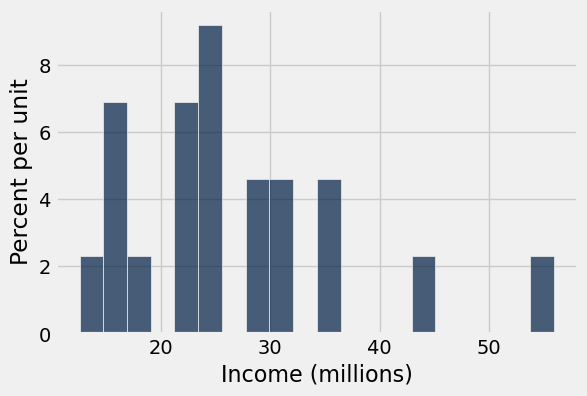

In [13]:
incomes.hist('Income (millions)', bins=20)

## Defining Functions ##  

Example: Create a function that takes a numerical input and triples it: $\textsf{triple}(x)=3\,x$

In [15]:
def triple(x):
    return 3 * x

In [17]:
triple(3)

9

We can also assign a value to a name, and call the function on the name:

In [19]:
num = 4

In [21]:
triple(num)

12

In [23]:
triple(num * 5)

60

## The Anatomy of a Function ##  
    
```python
def functionname(Arguments_Parameters_Expressions_or_Values):     
      return return_expression
```

## Functions are Type-Agnostic  ## 

In [25]:
triple('ha')

'hahaha'

In [27]:
np.arange(4)

array([0, 1, 2, 3])

Feed the array above into our function `triple` to see what is produced:

In [29]:
triple(np.arange(4))

array([0, 3, 6, 9])

### Discussion ###

- What does the following function do?
- What type of input does it take?
- What type of output does it produce?
- What's a good name for the function?

```python
def f(s):     
      return np.round(s / sum(s) * 100, 2)
```

In [31]:
def percent_of_total(s):
    return np.round(s / sum(s) * 100, 2)

In [33]:
first_four=make_array(1,2,3,4)
first_four

array([1, 2, 3, 4])

In [35]:
percent_of_total(first_four)

array([ 10.,  20.,  30.,  40.])

In [37]:
percent_of_total(make_array(1, 213, 38))

array([  0.4 ,  84.52,  15.08])

### Functions Can Take Multiple Arguments ###

Example: Calculate the Hypotenuse Length of a Right Triangle


Pythagoras's Theorem: If $x$ and $y$ denote the lengths of the right-angle sides, then the hypotenuse length $h$ satisfies:

$$ h^2 = x^2 + y^2 \qquad \text{which implies}\qquad \hspace{20 pt} h = \sqrt{ x^2 + y^2 } $$

In [39]:
def hypotenuse(x, y):
    hypot_squared = (x ** 2 + y ** 2)
    hypot = hypot_squared ** 0.5
    return hypot

In [41]:
hypotenuse(1, 2)

2.23606797749979

In [43]:
hypotenuse(3, 4)

5.0

We could've typed the body all in one line. Do you find this more readable or less readable than the original version?

In [45]:
def hypotenuse(x,y):
    return (x ** 2 + y ** 2) ** 0.5

In [47]:
hypotenuse(9, 12)

15.0

### Example: A function that takes the year of birth of a person and produces their age in years. ###

In [49]:
def age(year):
    age = 2022 - year
    return age

In [53]:
age(1942)

80

Now add some bells and whistles:  Take person's name and year of birth (two arguments). Produce a sentence that states how old they are.

In [51]:
def name_and_age(name, year):
    return name + ' is ' + str(age(year)) + ' years old.'

In [55]:
name_and_age('Joe', 1942)

'Joe is 80 years old.'

## Apply ##

In [57]:
ages = Table().with_columns(
    'Person', make_array('Jim', 'Pam', 'Michael', 'Creed'),
    'Birth Year', make_array(1985, 1988, 1967, 1904)
)
ages

Person,Birth Year
Jim,1985
Pam,1988
Michael,1967
Creed,1904


In [59]:
ages.apply(age, 'Birth Year')

array([ 37,  34,  55, 118])

In [61]:
make_array(age(ages.column('Birth Year').item(0)),
           age(ages.column('Birth Year').item(1)),
           age(ages.column('Birth Year').item(2)),
           age(ages.column('Birth Year').item(3)))

array([ 37,  34,  55, 118])

In [63]:
ages.apply(name_and_age, 'Person', 'Birth Year')

array(['Jim is 37 years old.', 'Pam is 34 years old.',
       'Michael is 55 years old.', 'Creed is 118 years old.'],
      dtype='<U24')